# Python Machine Learning 6
# Regularization
## *By Sal Lascano*

By now we are familiar with some learning algorithms such as Linear Regression and Logistic Regression. These algorithms work well for many problems but sometimes we run into a problem called overfitting. Overfitting is the event where the algorithm performs extremely well with the training set but performs poorly with the test set. Algorithms overfit when they have high variance, to fix this we want to introduce some bias, we want to keep the parameters normal or regular so it can perform better with data it has not seen yet.  

### Ridge Regression 

Lets recall the least squares 
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2$$

**Ridge regression** instead estimates $\beta$ by minimizing it, where $\lambda \ge 0$ is a *tuning parameter* to be determined.
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}\beta_j^2$$

By adding $\lambda \sum_{j=1}^{k}\beta_j^2$ in the loss function, the estimation will try to shrink the parameters toward 0 (but not 0), hence this term is also called the **shrinkage penalty** or **L2 penalty**.

The tuning parameter $\lambda$ is used to control the impact of these two terms on the regression coefficient estimates. 

When $\lambda = 0$, the ridge estimate is the same as with the least square estimate, so no penalty added.  

Selecting a good value for $\lambda$ is critical. In practice, we will do a grid search to find the best  $\lambda$ values. We will talk about grid search in the next notebook. 

### Ridge Regression in Scikit-Learn

If you read the documentation of **Ridge Regression** in python, you will see the following:

$$\min_{\theta}  \parallel X\theta - y \parallel_2^2 + \alpha \parallel \theta \parallel_2^2$$

Which in essense it's the same as the ridge formula above, except they used $\theta \text{ and } \alpha \text{ in the place of } \beta \text{ and } \lambda$. Also note that this function is in matrix notation. 

Traininging ridge regresison is similar to linear regression:

In [4]:
## prepare data
import pandas as pd
import numpy as np
adver = pd.read_csv('adver.csv', index_col=0)
x = np.array(adver[['TV', 'Radio', 'Newspaper']])
y = np.array(adver['Sales'])

In [5]:
adver.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([ 0.04576464,  0.1885251 , -0.00103629]), 2.9389674583301453)

In [33]:
## determination
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))

The determination of ridge regression is: 0.8972


In [21]:
## prediction 
ridge.predict([[5.2, 18.5, 3.7]])

array([14.02149302])

In [18]:
## prediction 
ridge.predict([[4, 1.5, 2]])

array([3.40274109])

In [34]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x, y)
    coef.append(ridge.coef_)


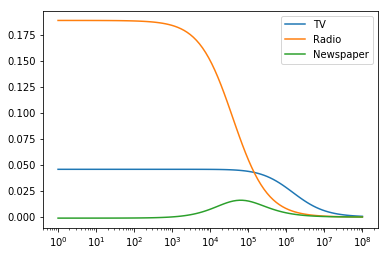

In [43]:
df_coef = pd.DataFrame(coef, index=alpha_100, columns=['TV', 'Radio', 'Newspaper'])
import matplotlib.pyplot as plt
# title = 'Ridge coefficients as a function of the regularization'
# axes.set_xlabel('alpha')
# axes.set_ylabel('coefficients')
axes = df_coef.plot(logx=True)
plt.show()

### Lasso Regression 

Lets recall the least squares again
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2$$

**Lasso regression** also adds a penalty to the OLS but it is a little bit different than ridge. The penalty **Lasso** uses is called norm1. In **Lasso** the penalty term $\sum_{j=1}^{k}\beta_j^2$ is replaced by $\sum_{j=1}^{k}|\beta_j|$, this also shrinks the coefficient estimates towards zero. The L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large. Hence lasso can be used for feature selection. As a result, models generated from the lasso are generally much easier to interpret than those produced by ridge regression.


$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}|\beta_j|$$

### Lasso Regression in Scikit-Learn

If you read the documentation of **Lasso Regression** in python, you will see the following:

$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha | \theta |_1$$

Which in essense it's the same as the Lasso formula above, except they used $\theta \text{ and } \alpha \text{ in the place of } \beta \text{ and } \lambda$. Also note that this function is in matrix notation. 

Implementing `Lasso` is similar to ridge regression:

In [44]:
## coefficients
lasso = linear_model.Lasso(alpha=1) # create a lasso instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([0.04566142, 0.1834644 , 0.        ]), 3.040215583480377)

Note that the third coefficient is exactly 0!

In [45]:
## determination
print("The determination of ridge regression is: %.4f" %lasso.score(x, y))

The determination of ridge regression is: 0.8970


In [46]:
## prediction
lasso.predict([[5.2, 18.5, 3.7]])

array([6.6717463])

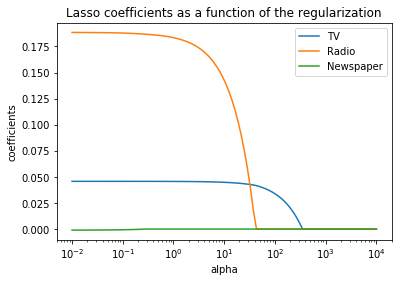

In [47]:
alphas_lasso = np.logspace(-2, 4, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(x, y)
    coef_lasso.append(lasso.coef_)
    
columns = ['TV', 'Radio', 'Newspaper']
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

### Ridge and Lasso

Both Ridge and Lasso can be applied in the same contexts. The big difference between these two is that Ridge can only shrink the slope very close to 0, while Lasso can shrink the slope all the way to 0. 

For example: If we had data with features that are useless, Ridge will only minimize the weight of those useless features while Lasso will totally drop them. 

Since Lasso can exclude variables from ecuations it is a little bit better than Ridge at reducing variance in models that contain a lot of useless variables. Ridge tends to do a little better when most features are useful.

To sum up, Ridge and Lasso are very similar, the only difference is that Ridge squares the slope while Lasso takes the absolute value. In order to determine which approach is better we will need to use a technique called cross validation which we are already familiar with as it was part of notebook 4. To find out the appropiate Lambda we will need to use a technique called grid search which we will discuss in notebook 7. 

### ElasticNet in Scikit-Learn

If you read the documentation of **ElasticNet** in python, you will see the following:

$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha \rho | \theta |_1 + \frac{\alpha(1-\rho)}{2} \parallel \theta \parallel_2^2$$

where $n$ refers to the number of observations, and $0 \le \rho \le1$. Also note that this function is in matrix notation. 

- $\alpha$ controls the effects of regularization.
- $\rho$ control the convex combination of L1 and L2. 
    - $\rho = 0$ degenerates back to ridge regression
    - $\rho = 1$ degenerates back to lasso

In [50]:
## coefficients
elastic = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic.fit(x, y) # fit model
elastic.coef_, elastic.intercept_ # coefficients

(array([ 0.04570901,  0.18530658, -0.        ]), 2.990360061819066)

In [51]:
## determination
print("The determination of ElasticNet is: %.4f" %elastic.score(x, y))

The determination of ElasticNet is: 0.8971


In [52]:
## prediction
elastic.predict([[5.2, 18.5, 3.7]])

array([6.65621868])

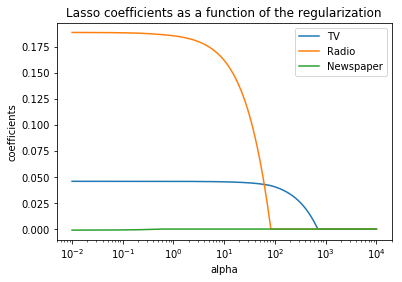

In [53]:
alphas_elastic = np.logspace(-2, 4, 1000)
coef_elastic = []
for i in alphas_elastic:
    elastic = linear_model.ElasticNet(l1_ratio =0.5)
    elastic.set_params(alpha = i)
    elastic.fit(x, y)
    coef_elastic.append(elastic.coef_)
    
columns = ['TV', 'Radio', 'Newspaper']
df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()